In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

# Load cleaned data
benin = pd.read_csv("../data/benin-malanville.csv")
sierra_leone = pd.read_csv("../data/sierraleone-bumbuna.csv")
togo = pd.read_csv("../data/togo-dapaong_qc.csv")

# Add country labels
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine into one DataFrame
df = pd.concat([benin, sierra_leone, togo], ignore_index=True)


C:\Users\user\AppData\Local\Temp\ipykernel_10296\72206842.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y=metric, palette='Set2')


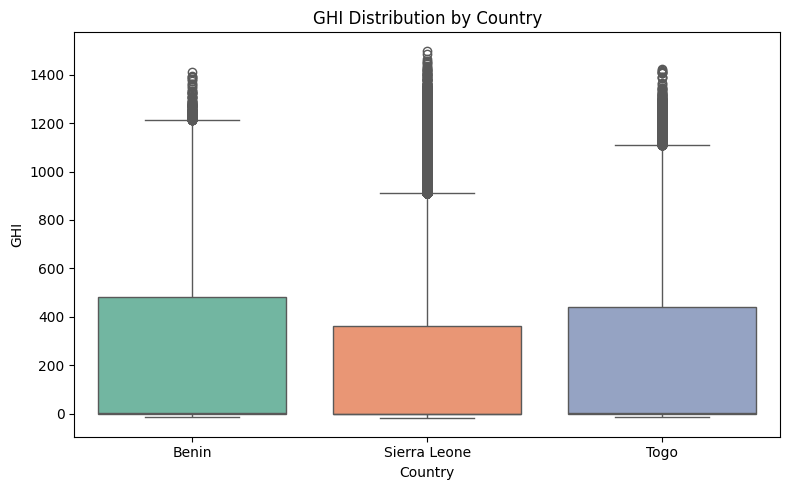

C:\Users\user\AppData\Local\Temp\ipykernel_10296\72206842.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y=metric, palette='Set2')


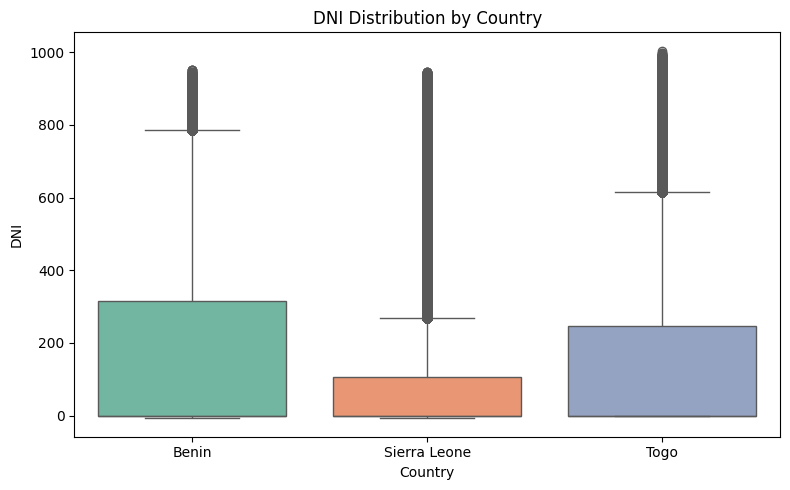

C:\Users\user\AppData\Local\Temp\ipykernel_10296\72206842.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y=metric, palette='Set2')


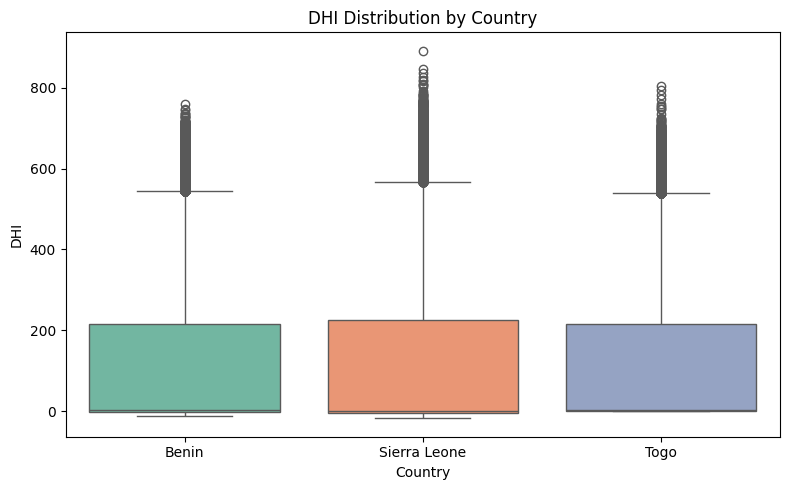

In [14]:
metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Country', y=metric, palette='Set2')
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(metric)
    plt.xlabel("Country")
    plt.tight_layout()
    plt.show()


In [15]:
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

In [16]:
# Extract GHI values per country
ghi_benin = benin['GHI']
ghi_sl = sierra_leone['GHI']
ghi_togo = togo['GHI']

# One-way ANOVA (parametric)
f_stat, p_val_anova = f_oneway(ghi_benin, ghi_sl, ghi_togo)

# Kruskal-Wallis (non-parametric)
h_stat, p_val_kruskal = kruskal(ghi_benin, ghi_sl, ghi_togo)

print(f"ANOVA p-value: {p_val_anova:.4f}")
print(f"Kruskal–Wallis p-value: {p_val_kruskal:.4f}")


ANOVA p-value: 0.0000
Kruskal–Wallis p-value: 0.0000


In [17]:
### Key Observations

- Sierra Leone shows the highest median GHI, indicating strong solar potential.
- Benin displays the greatest variability in DNI, suggesting less consistent solar conditions.
- Togo has the most stable DHI values, which could be favorable for diffuse light technologies.


SyntaxError: invalid syntax (2002604648.py, line 3)

C:\Users\user\AppData\Local\Temp\ipykernel_10296\3154815927.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')


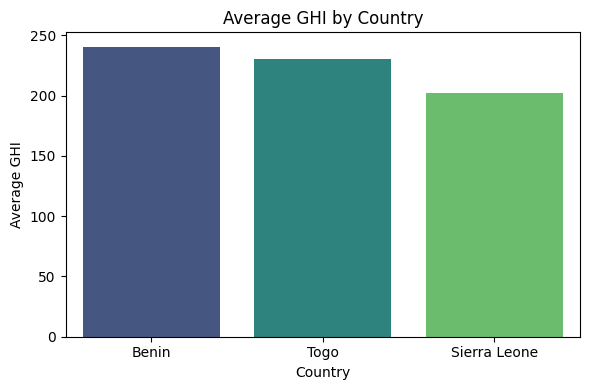

In [18]:
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')
plt.ylabel("Average GHI")
plt.title("Average GHI by Country")
plt.tight_layout()
plt.show()
